In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Covid_19_Clean_Complete.csv")

In [3]:
df = pd.DataFrame(data)
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [4]:
data

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [8]:
df.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
WHO Region         object
dtype: object

In [9]:
df['Date'].value_counts()

Date
2020-01-22    261
2020-05-30    261
2020-05-21    261
2020-05-22    261
2020-05-23    261
             ... 
2020-03-26    261
2020-03-27    261
2020-03-28    261
2020-03-29    261
2020-07-27    261
Name: count, Length: 188, dtype: int64

In [10]:
df['Date'].max()

'2020-07-27'

In [11]:
df['Date'].min()

'2020-01-22'

In [12]:
top = df[df['Date'] == '2020-07-27']
top

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48807,NaN,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [13]:
#group all the entries based on the country
top.groupby(by='Country/Region').sum()

,Province/State,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
Country/Region,,,,,,,,,
Afghanistan,0,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
Albania,0,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe
Algeria,0,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa
Andorra,0,42.506300,1.521800,2020-07-27,907,52,803,52,Europe
Angola,0,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa
...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,31.952200,35.233200,2020-07-27,10621,78,3752,6791,Eastern Mediterranean
Western Sahara,0,24.215500,-12.885800,2020-07-27,10,1,8,1,Africa
Yemen,0,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean


In [14]:
top.groupby(by='Country/Region')[['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active']].sum()

,Date,Confirmed,Deaths,Recovered,Active
Country/Region,,,,,
Afghanistan,2020-07-27,36263,1269,25198,9796
Albania,2020-07-27,4880,144,2745,1991
Algeria,2020-07-27,27973,1163,18837,7973
Andorra,2020-07-27,907,52,803,52
Angola,2020-07-27,950,41,242,667
...,...,...,...,...,...
West Bank and Gaza,2020-07-27,10621,78,3752,6791
Western Sahara,2020-07-27,10,1,8,1
Yemen,2020-07-27,1691,483,833,375


In [15]:
#23 Jan, 2020 total confirmed cases of all contries
confirmed = df.groupby(by='Date')['Confirmed'].sum().reset_index()

In [16]:
confirmed[confirmed['Date'] == '2020-01-23']['Confirmed']

1    654
Name: Confirmed, dtype: int64

In [17]:
df[df['Date'] == '2023-01-23']['Confirmed'].sum() #Todo J, have to re-look as it has to give equal result as above

0

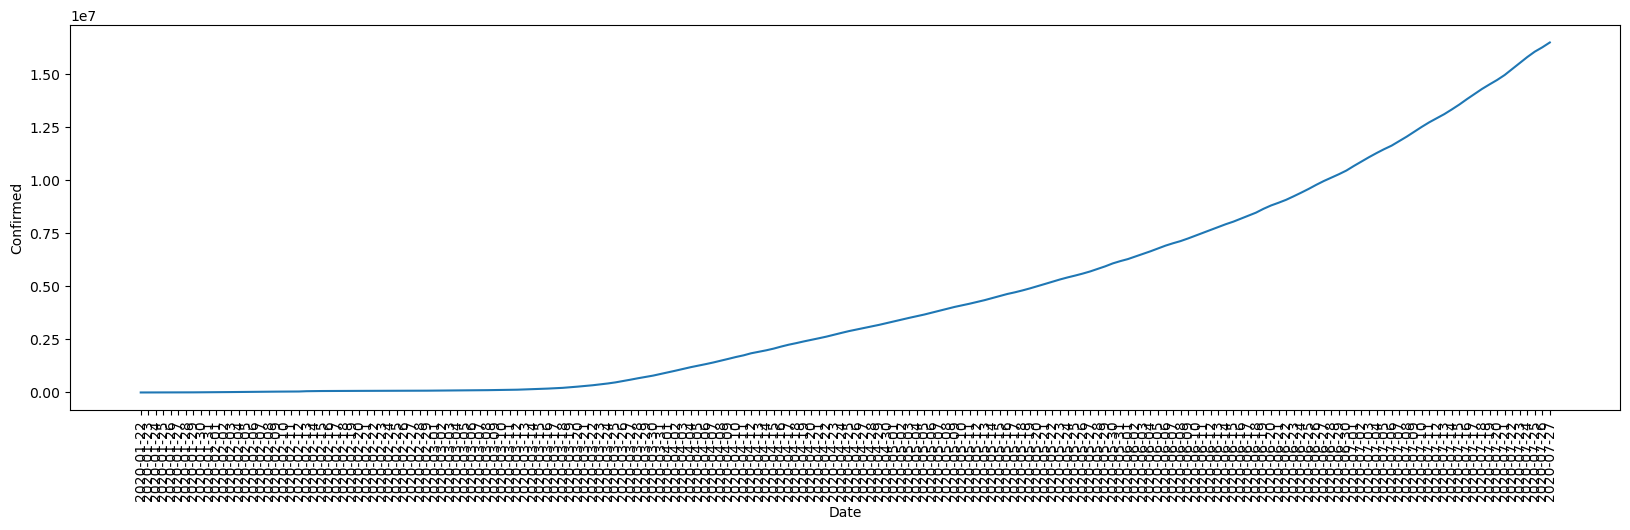

In [18]:
plt.figure(figsize =(20,5))
sns.lineplot(data=confirmed, x='Date', y='Confirmed')

plt.xticks(rotation=90)

plt.show()

In [19]:
# Top 10 countries with most recovered countries

top10 = df.groupby('Country/Region')['Recovered'].sum().sort_values(ascending=False).reset_index().head(10)
top10

,Country/Region,Recovered
0,US,56353416
1,Brazil,54492873
2,Russia,25120448
3,India,23783720
4,Germany,17107839
5,Italy,15673910
6,Iran,15200895
7,Spain,15093583
8,Turkey,13345389
9,Chile,13292593


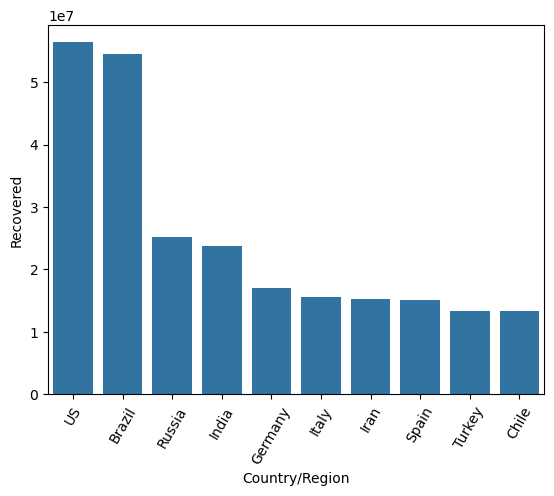

In [20]:

sns.barplot(data = top10, x='Country/Region', y='Recovered')
plt.xticks(rotation=60)
plt.show()

In [21]:
# find the top 10 countries with most deaths
# top 10 countries with most active cases

In [22]:
top10Deaths = df.groupby(by='Country/Region')['Deaths'].sum().sort_values(ascending=False).reset_index().head(10)
top10Deaths

,Country/Region,Deaths
0,US,11011411
1,United Kingdom,3997775
2,Brazil,3938034
3,Italy,3707717
4,France,3048524
5,Spain,3033030
6,Mexico,1728277
7,India,1111831
8,Iran,1024136
9,Belgium,963679


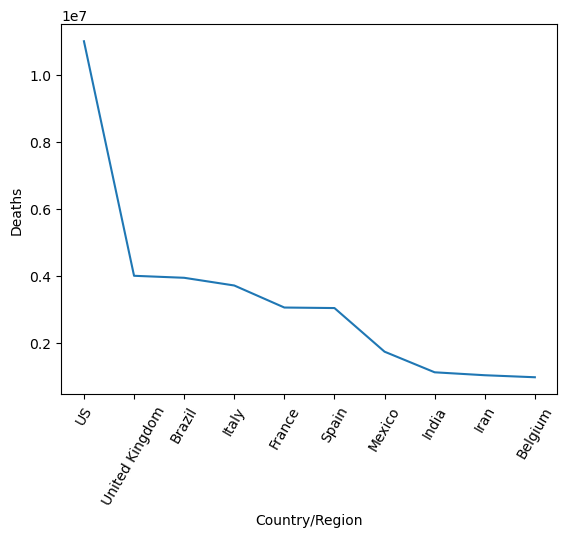

In [23]:
sns.lineplot(data=top10Deaths, x='Country/Region', y='Deaths')
plt.xticks(rotation=60)
plt.show()

In [24]:
# US, Brazil, India

In [25]:
US = df[df['Country/Region'] == 'US']
US

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
223,NaN,US,40.0,-100.0,2020-01-22,1,0,0,1,Americas
484,NaN,US,40.0,-100.0,2020-01-23,1,0,0,1,Americas
745,NaN,US,40.0,-100.0,2020-01-24,2,0,0,2,Americas
1006,NaN,US,40.0,-100.0,2020-01-25,2,0,0,2,Americas
1267,NaN,US,40.0,-100.0,2020-01-26,5,0,0,5,Americas
...,...,...,...,...,...,...,...,...,...,...
47986,NaN,US,40.0,-100.0,2020-07-23,4038816,144430,1233269,2661117,Americas
48247,NaN,US,40.0,-100.0,2020-07-24,4112531,145560,1261624,2705347,Americas
48508,NaN,US,40.0,-100.0,2020-07-25,4178970,146465,1279414,2753091,Americas
48769,NaN,US,40.0,-100.0,2020-07-26,4233923,146935,1297863,2789125,Americas


In [26]:
US = US.groupby(by='Date')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()
US

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,1,0,0,1
1,2020-01-23,1,0,0,1
2,2020-01-24,2,0,0,2
3,2020-01-25,2,0,0,2
4,2020-01-26,5,0,0,5
...,...,...,...,...,...
183,2020-07-23,4038816,144430,1233269,2661117
184,2020-07-24,4112531,145560,1261624,2705347
185,2020-07-25,4178970,146465,1279414,2753091
186,2020-07-26,4233923,146935,1297863,2789125


In [27]:
Brazil = df[df['Country/Region'] == 'Brazil']
Brazil = Brazil.groupby(by='Date')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()
Brazil

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,2287475,84082,1620313,583080
184,2020-07-24,2343366,85238,1693214,564914
185,2020-07-25,2394513,86449,1785359,522705
186,2020-07-26,2419091,87004,1812913,519174


In [28]:
India = df[df['Country/Region'] == 'India']
India = India.groupby(by='Date')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()
India

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,1288108,30601,817209,440298
184,2020-07-24,1337024,31358,849432,456234
185,2020-07-25,1385635,32060,885573,468002
186,2020-07-26,1435616,32771,917568,485277


In [29]:
Pakistan = df[df['Country/Region'] == 'Pakistan']
Pakistan = Pakistan.groupby(by='Date')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()
Pakistan

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,270400,5763,219783,44854
184,2020-07-24,271887,5787,236596,29504
185,2020-07-25,273113,5822,237434,29857
186,2020-07-26,273113,5822,237434,29857


In [30]:
China = df[df['Country/Region'] == 'China']
China = China.groupby(by='Date')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()
Pakistan

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,270400,5763,219783,44854
184,2020-07-24,271887,5787,236596,29504
185,2020-07-25,273113,5822,237434,29857
186,2020-07-26,273113,5822,237434,29857


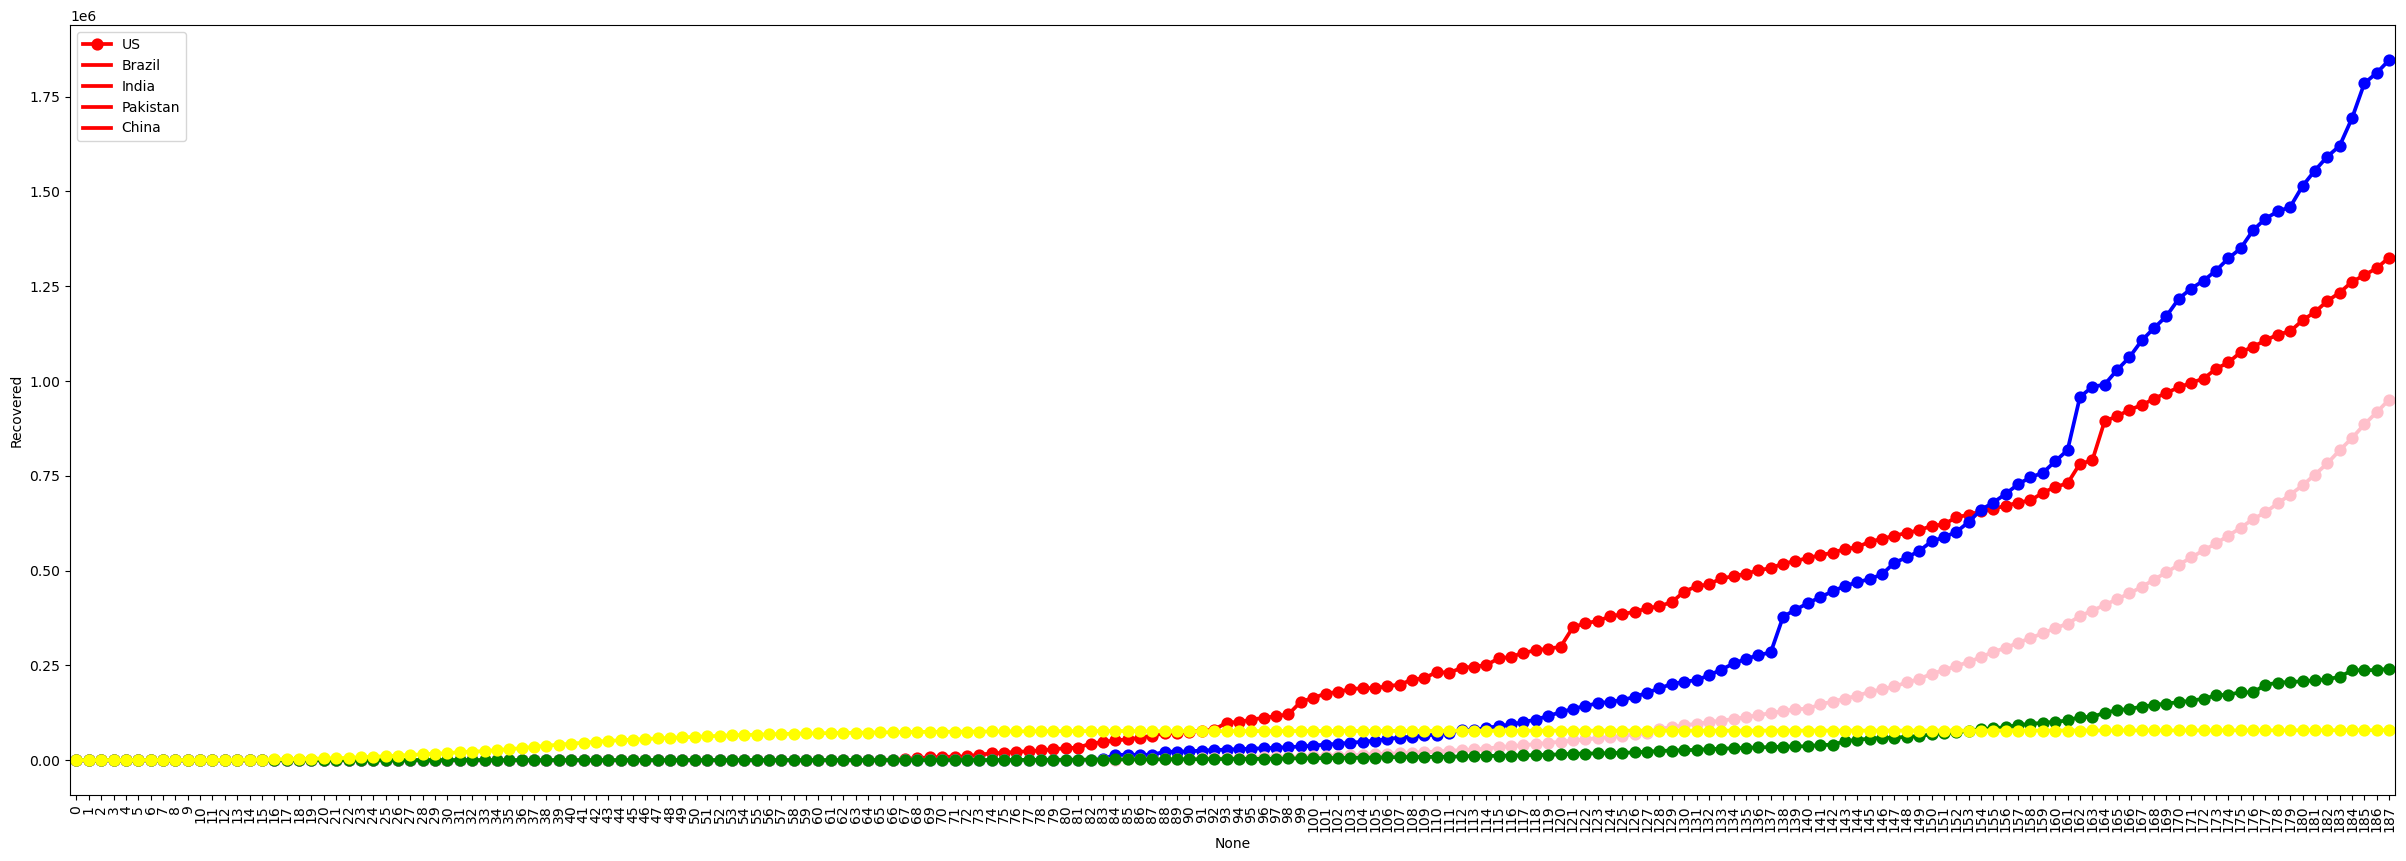

In [31]:
plt.figure(figsize = (30,10))
sns.pointplot(x=US.index, y = US.Recovered, color = 'Red', label = "US")
sns.pointplot(x=Brazil.index, y = Brazil.Recovered, color = 'Blue', label = "Brazil")
sns.pointplot(x=India.index, y = India.Recovered, color = 'Pink', label = "India")
sns.pointplot(x=Pakistan.index, y = Pakistan.Recovered, color = 'Green', label = "Pakistan")
sns.pointplot(x=China.index, y = China.Recovered, color = 'Yellow', label = "China")
plt.xticks(rotation=90)
plt.legend(["US", "Brazil", "India", "Pakistan", "China"])
plt.show()

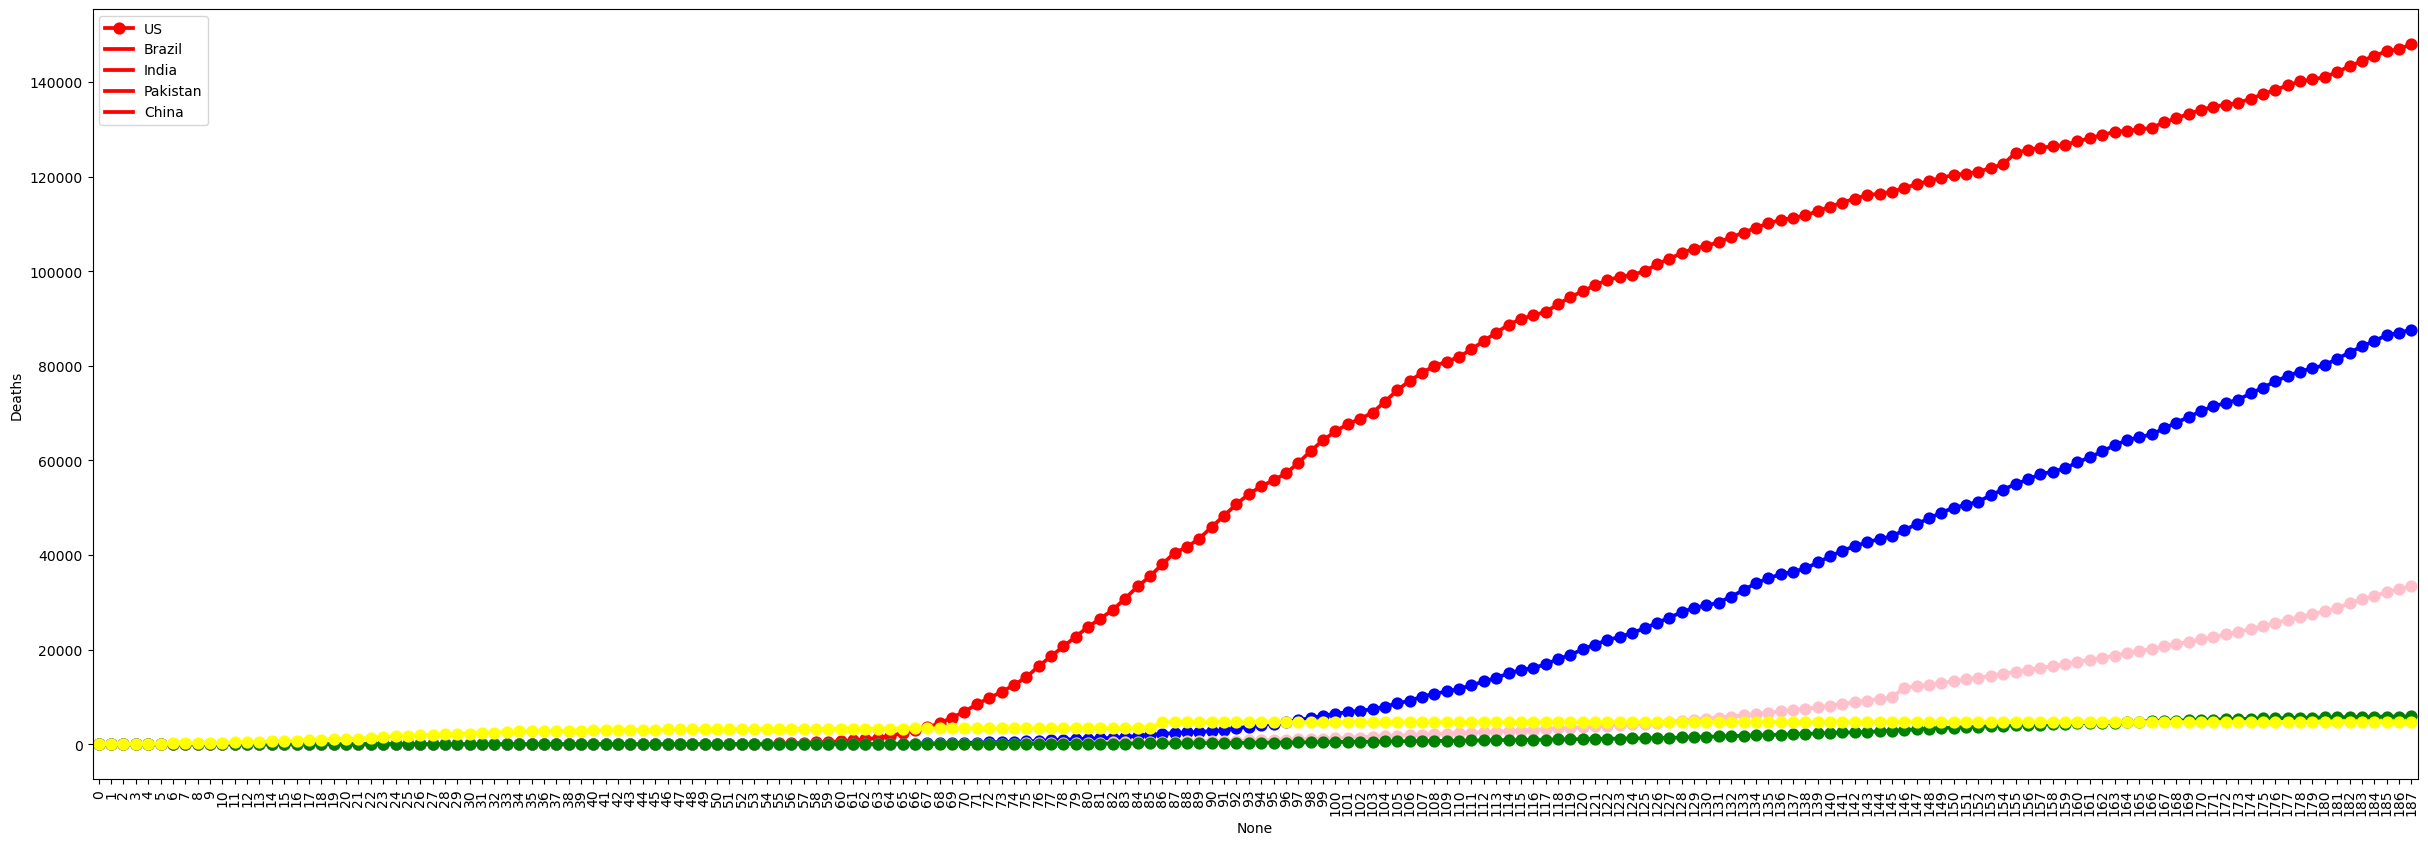

In [32]:
plt.figure(figsize = (30,10))
sns.pointplot(x=US.index, y = US.Deaths, color = 'Red', label = "US")
sns.pointplot(x=Brazil.index, y = Brazil.Deaths, color = 'Blue', label = "Brazil")
sns.pointplot(x=India.index, y = India.Deaths, color = 'Pink', label = "India")
sns.pointplot(x=Pakistan.index, y = Pakistan.Deaths, color = 'Green', label = "Pakistan")
sns.pointplot(x=China.index, y = China.Deaths, color = 'Yellow', label = "China")
plt.xticks(rotation=90)
plt.legend(["US", "Brazil", "India", "Pakistan", "China"])
plt.show()

In [33]:
# Model Building

In [34]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                  int64
Active                     int64
WHO Region                object
dtype: object

In [35]:
confirmed_data = df.groupby(by='Date')['Confirmed'].sum().reset_index()
confirmed_data

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [36]:
#changing the column names as prophet model vill understand only these 2 cols
confirmed_data.columns = ['ds', 'y']



confirmed_data

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [46]:
#Install prophet library
!pip install prophet

Defaulting to user installation because normal site-packages is not writeable


In [37]:
# Importing prophet
from prophet import Prophet

In [38]:
model=Prophet()

In [39]:
model.fit(confirmed_data)

17:05:23 - cmdstanpy - INFO - Chain [1] start processing
17:05:23 - cmdstanpy - INFO - Chain [1] done processing


In [40]:
# Forecasting for next 7 days

In [42]:
future = model.make_future_dataframe(7, freq = 'D', include_history = False)

In [43]:
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-07-28,1.634079e+07,1.622484e+07,1.642724e+07,1.634079e+07,1.634079e+07,-16782.130444,-16782.130444,-16782.130444,-16782.130444,-16782.130444,-16782.130444,0.0,0.0,0.0,1.632401e+07
1,2020-07-29,1.654504e+07,1.643347e+07,1.664000e+07,1.654317e+07,1.654551e+07,-10986.210444,-10986.210444,-10986.210444,-10986.210444,-10986.210444,-10986.210444,0.0,0.0,0.0,1.653405e+07
2,2020-07-30,1.674928e+07,1.663958e+07,1.685936e+07,1.674268e+07,1.675247e+07,-1078.891654,-1078.891654,-1078.891654,-1078.891654,-1078.891654,-1078.891654,0.0,0.0,0.0,1.674820e+07
3,2020-07-31,1.695352e+07,1.685533e+07,1.707297e+07,1.694099e+07,1.696299e+07,10103.249373,10103.249373,10103.249373,10103.249373,10103.249373,10103.249373,0.0,0.0,0.0,1.696362e+07
4,2020-08-01,1.715776e+07,1.705797e+07,1.727989e+07,1.713566e+07,1.717355e+07,13670.214198,13670.214198,13670.214198,13670.214198,13670.214198,13670.214198,0.0,0.0,0.0,1.717143e+07


In [44]:
forecast[['ds', 'yhat', 'yhat_upper', 'yhat_lower']]

,ds,yhat,yhat_upper,yhat_lower
0,2020-07-28,1.632401e+07,1.642724e+07,1.622484e+07
1,2020-07-29,1.653405e+07,1.664000e+07,1.643347e+07
2,2020-07-30,1.674820e+07,1.685936e+07,1.663958e+07
3,2020-07-31,1.696362e+07,1.707297e+07,1.685533e+07
4,2020-08-01,1.717143e+07,1.727989e+07,1.705797e+07
5,2020-08-02,1.736922e+07,1.748371e+07,1.724704e+07
6,2020-08-03,1.756410e+07,1.768495e+07,1.743792e+07


C:\Users\Centina\AppData\Roaming\Python\Python312\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Centina\AppData\Roaming\Python\Python312\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


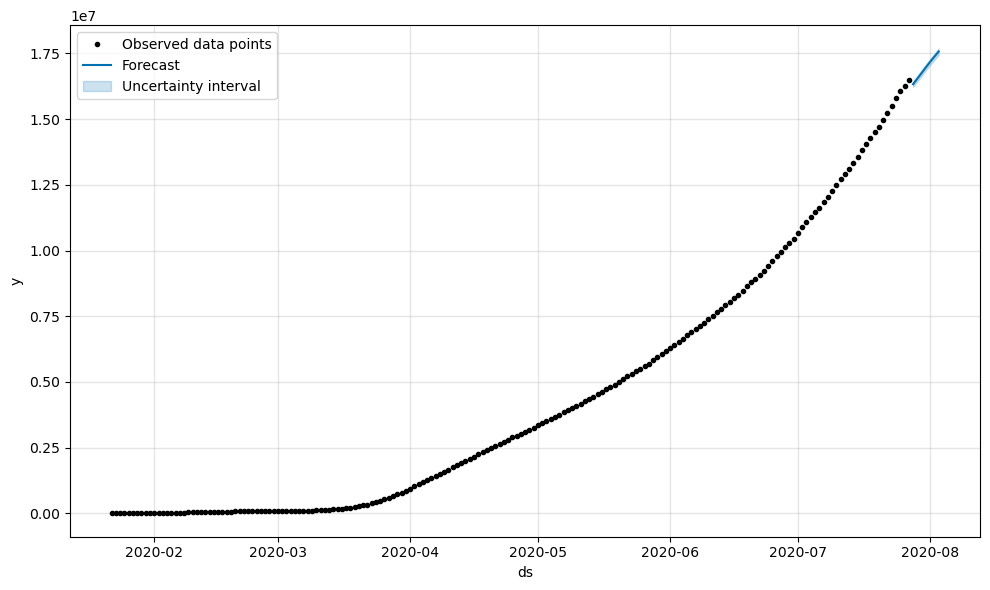

In [45]:
model.plot(forecast, include_legend=True)
plt.show()

C:\Users\Centina\AppData\Roaming\Python\Python312\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Centina\AppData\Roaming\Python\Python312\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


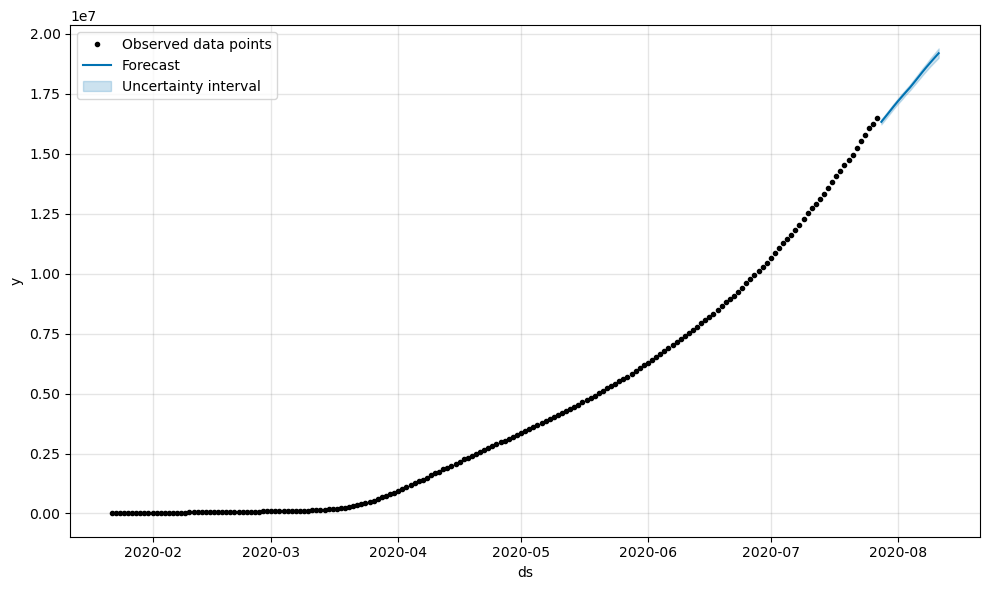

In [47]:
# Forecasting for next 15 days
future = model.make_future_dataframe(15, freq = 'D', include_history = False)
forecast = model.predict(future)
forecast.head()
forecast[['ds', 'yhat', 'yhat_upper', 'yhat_lower']]
model.plot(forecast, include_legend=True)
plt.show()

C:\Users\Centina\AppData\Roaming\Python\Python312\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Centina\AppData\Roaming\Python\Python312\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


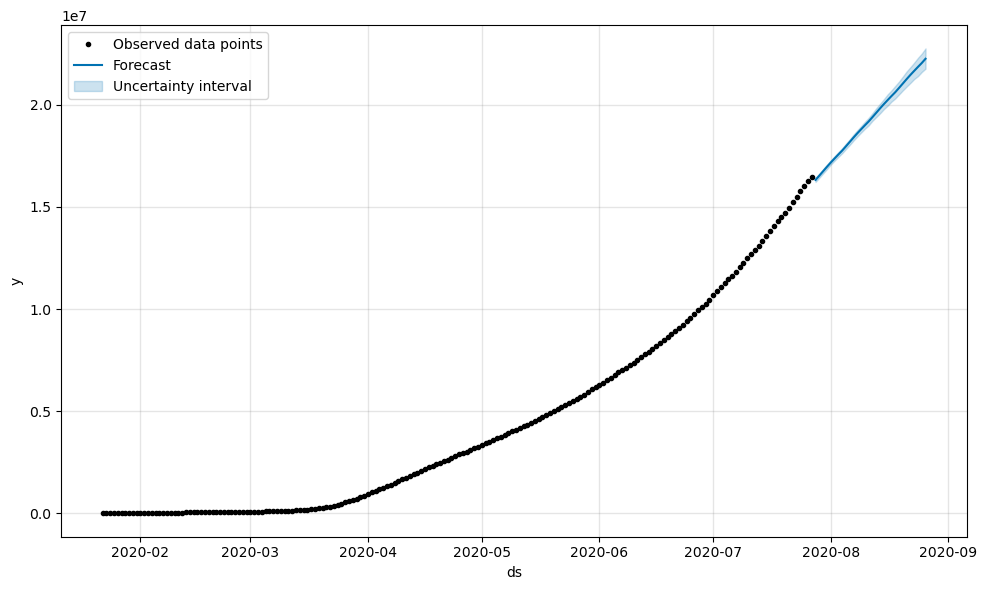

In [48]:
# Forecasting for next 30 days
future = model.make_future_dataframe(30, freq = 'D', include_history = False)
forecast = model.predict(future)
forecast.head()
forecast[['ds', 'yhat', 'yhat_upper', 'yhat_lower']]
model.plot(forecast, include_legend=True)
plt.show()

C:\Users\Centina\AppData\Roaming\Python\Python312\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
C:\Users\Centina\AppData\Roaming\Python\Python312\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Centina\AppData\Roaming\Python\Python312\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


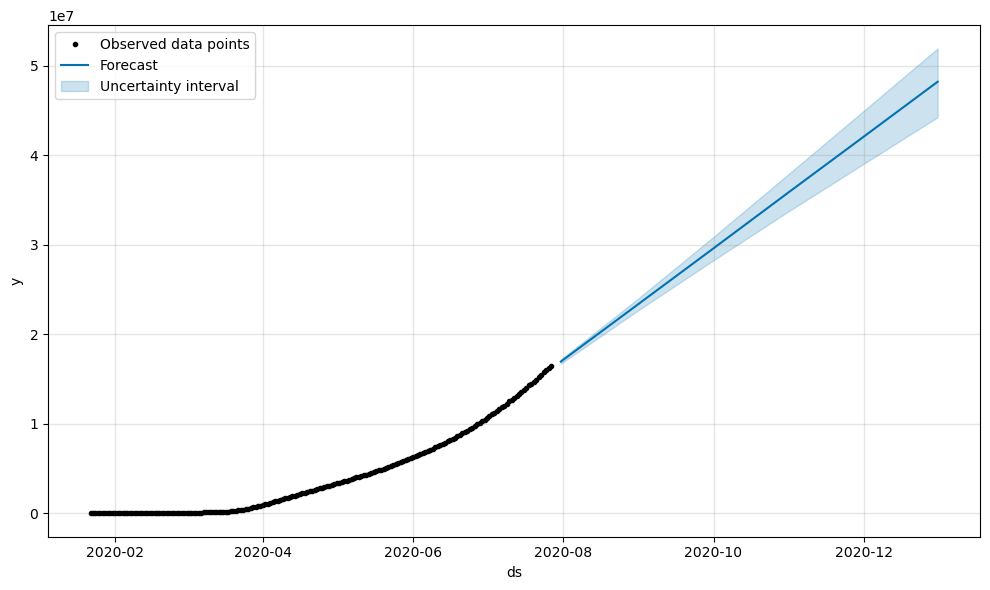

In [49]:
# Forecasting for next 6 months
future = model.make_future_dataframe(6, freq = 'M', include_history = False)
forecast = model.predict(future)
forecast.head()
forecast[['ds', 'yhat', 'yhat_upper', 'yhat_lower']]
model.plot(forecast, include_legend=True)
plt.show()